In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from draw_sky2 import draw_sky
from scipy import optimize


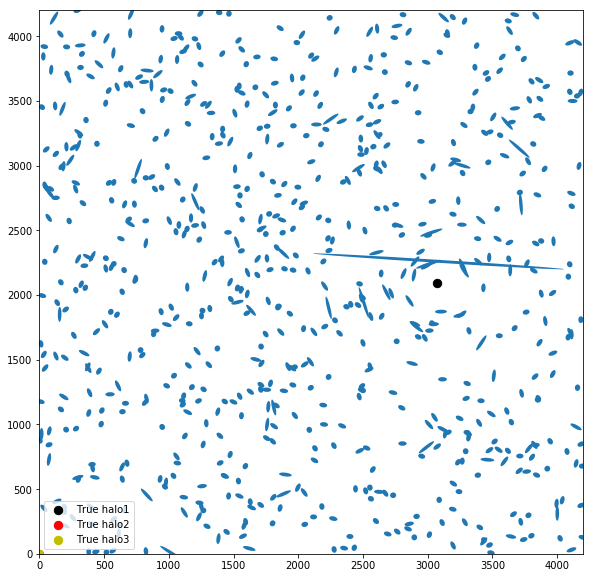

In [66]:
sky=11
train_sky_sample=pd.read_csv('Train_Skies/Training_Sky%d.csv'%(sky))
train_sky_sample.head()
#plotting sky and the true halo position 
fig=draw_sky(train_sky_sample.as_matrix()[:,1:])
halos_data=pd.read_csv('Training_halos.csv')
halo=halos_data[halos_data.SkyId=='Sky%d'%sky]
plt.scatter(halo.halo_x1, halo.halo_y1, 
            label = "True halo1",
            c = "k", s = 70)
plt.scatter(halo.halo_x2, halo.halo_y2, 
            label = "True halo2",
            c = "r", s = 70)
plt.scatter(halo.halo_x3, halo.halo_y3, 
            label = "True halo3",
            c = "y", s = 70)
plt.legend(scatterpoints = 1, loc = "lower left")
plt.xlim(0, 4200)
plt.ylim(0, 4200);


(array([ 1.,  2.,  9., 29., 72., 89., 76., 28., 11.,  2.]),
 array([-0.927878, -0.761417, -0.594956, -0.428495, -0.262034, -0.095573,
         0.070888,  0.237349,  0.40381 ,  0.570271,  0.736732]),
 <a list of 10 Patch objects>)

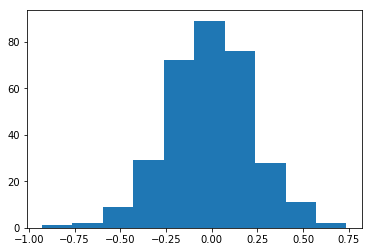

In [38]:
plt.hist(train_sky_sample.e1)

In [35]:
train_sky_sample.e1.describe()

count    396.000000
mean      -0.011683
std        0.212479
min       -0.523930
25%       -0.163201
50%       -0.027774
75%        0.131212
max        0.775825
Name: e1, dtype: float64

In [36]:
train_sky_sample.e2.describe()

count    396.000000
mean      -0.006170
std        0.213833
min       -0.564768
25%       -0.152902
50%       -0.009963
75%        0.137586
max        0.670464
Name: e2, dtype: float64

In [52]:
# get map estimate for all the skies with 1 halo

In [59]:
halos_data=pd.read_csv('Training_halos.csv')
masses=[]
def get_e1(m,h,g):
    return -(m/np.sqrt((h[:,0]-g[:,0])**2+(h[:,1]-g[:,1])**2))*np.cos(2*np.arctan((g[:,1]-h[:,1])/(g[:,0]-h[:,0])))
def get_e2(m,h,g):
    return -(m/np.sqrt((h[:,0]-g[:,0])**2+(h[:,1]-g[:,1])**2))*np.sin(2*np.arctan((g[:,1]-h[:,1])/(g[:,0]-h[:,0])))
for sky in range(1,101):
    train_sky=pd.read_csv('Train_Skies/Training_Sky%d.csv'%(sky))
    halo=halos_data[halos_data.SkyId=='Sky%d'%sky]
    with pm.Model() as finding_1_mass_model:
        m=pm.Uniform("mass", 0, 1000)
        h=pm.Flat("halo_pos",observed=halo[['halo_x1','halo_y1']].as_matrix())   
        g=pm.Flat("galaxy_pos", observed=train_sky[['x','y']].as_matrix())  
        e1=pm.Deterministic('e1',get_e1(m,h,g))
        e2=pm.Deterministic('e2',get_e2(m,h,g))
        sigma=np.sqrt(0.05)
        e1_obs=pm.Normal('e1_obs',mu=e1,sd=sigma,observed=train_sky.e1.values)
        e2_obs=pm.Normal('e2_obs',mu=e2,sd=sigma,observed=train_sky.e2.values)
        map_estimate = pm.find_MAP(fmin=optimize.fmin_powell)
    masses.append(map_estimate['mass'])

/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:92: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = 85.896:   1%|          | 41/5000 [00:00<00:11, 422.37it/s] 


Optimization terminated successfully.
         Current function value: -85.896427
         Iterations: 2
         Function evaluations: 41


logp = 145.81:   1%|          | 40/5000 [00:00<00:11, 443.20it/s] 


Optimization terminated successfully.
         Current function value: -145.808689
         Iterations: 2
         Function evaluations: 40


logp = 152.11:   1%|          | 37/5000 [00:00<00:13, 371.08it/s] 


Optimization terminated successfully.
         Current function value: -152.108846
         Iterations: 2
         Function evaluations: 37


logp = 104.5:   1%|          | 43/5000 [00:00<00:12, 398.92it/s]    


Optimization terminated successfully.
         Current function value: -104.502903
         Iterations: 2
         Function evaluations: 43


logp = 103.47:   1%|          | 37/5000 [00:00<00:12, 396.57it/s] 


Optimization terminated successfully.
         Current function value: -103.472594
         Iterations: 2
         Function evaluations: 37


logp = 122.54:   1%|          | 38/5000 [00:00<00:12, 408.56it/s] 


Optimization terminated successfully.
         Current function value: -122.549993
         Iterations: 2
         Function evaluations: 38


logp = 139.25:   1%|          | 43/5000 [00:00<00:11, 440.35it/s]   


Optimization terminated successfully.
         Current function value: -139.249515
         Iterations: 2
         Function evaluations: 43


logp = 171.89:   1%|          | 37/5000 [00:00<00:12, 394.78it/s] 


Optimization terminated successfully.
         Current function value: -171.887041
         Iterations: 2
         Function evaluations: 37


logp = 183.18:   1%|          | 43/5000 [00:00<00:11, 436.98it/s] 


Optimization terminated successfully.
         Current function value: -183.178092
         Iterations: 2
         Function evaluations: 43


logp = 87.887:   1%|          | 40/5000 [00:00<00:17, 282.04it/s] 


Optimization terminated successfully.
         Current function value: -87.887437
         Iterations: 2
         Function evaluations: 40


logp = 168.3:   1%|          | 30/5000 [00:00<00:02, 2379.07it/s] 

Optimization terminated successfully.
         Current function value: -168.295046
         Iterations: 2
         Function evaluations: 39


logp = 150.45:   1%|          | 45/5000 [00:00<00:17, 276.00it/s]   


Optimization terminated successfully.
         Current function value: -150.448739
         Iterations: 2
         Function evaluations: 45


logp = 219.75:   1%|          | 38/5000 [00:00<00:21, 234.29it/s] 


Optimization terminated successfully.
         Current function value: -219.765713
         Iterations: 2
         Function evaluations: 38


logp = 129.58:   1%|          | 44/5000 [00:00<00:18, 268.79it/s] 


Optimization terminated successfully.
         Current function value: -129.577369
         Iterations: 2
         Function evaluations: 44


logp = 130.91:   1%|          | 38/5000 [00:00<00:20, 237.00it/s] 


Optimization terminated successfully.
         Current function value: -130.916659
         Iterations: 2
         Function evaluations: 38


logp = 119.75:   1%|          | 44/5000 [00:00<00:17, 286.29it/s]   


Optimization terminated successfully.
         Current function value: -119.749931
         Iterations: 2
         Function evaluations: 44


logp = 177.13:   1%|          | 42/5000 [00:00<00:20, 241.03it/s]   


Optimization terminated successfully.
         Current function value: -177.130484
         Iterations: 2
         Function evaluations: 42


logp = 163.35:   1%|          | 40/5000 [00:00<00:02, 2363.92it/s]

Optimization terminated successfully.
         Current function value: -163.347294
         Iterations: 2
         Function evaluations: 44


logp = 157.61:   1%|          | 30/5000 [00:00<00:02, 2158.42it/s]

Optimization terminated successfully.
         Current function value: -157.611833
         Iterations: 2
         Function evaluations: 40


logp = 200.09:   1%|          | 40/5000 [00:00<00:02, 2387.37it/s] 

Optimization terminated successfully.
         Current function value: -200.092509
         Iterations: 2
         Function evaluations: 44


logp = 153.28:   1%|          | 43/5000 [00:00<00:20, 236.76it/s]   


Optimization terminated successfully.
         Current function value: -153.278977
         Iterations: 2
         Function evaluations: 43


logp = 111.57:   1%|          | 40/5000 [00:00<00:22, 216.61it/s]  


Optimization terminated successfully.
         Current function value: -111.570529
         Iterations: 2
         Function evaluations: 40


logp = 220.83:   1%|          | 47/5000 [00:00<00:20, 245.79it/s] 


Optimization terminated successfully.
         Current function value: -220.828059
         Iterations: 2
         Function evaluations: 47


logp = 61.608:   1%|          | 30/5000 [00:00<00:01, 2611.92it/s] 

Optimization terminated successfully.
         Current function value: -61.612113
         Iterations: 2
         Function evaluations: 39


logp = 150.5:   1%|          | 30/5000 [00:00<00:02, 2280.67it/s] 

Optimization terminated successfully.
         Current function value: -150.498644
         Iterations: 2
         Function evaluations: 36


logp = 212.61:   1%|          | 55/5000 [00:00<00:17, 279.75it/s]  


Optimization terminated successfully.
         Current function value: -212.608129
         Iterations: 2
         Function evaluations: 55


logp = 178.55:   1%|          | 37/5000 [00:00<00:26, 189.78it/s] 


Optimization terminated successfully.
         Current function value: -178.546963
         Iterations: 2
         Function evaluations: 37


logp = 167.04:   1%|          | 44/5000 [00:00<00:23, 207.04it/s] 


Optimization terminated successfully.
         Current function value: -167.042485
         Iterations: 2
         Function evaluations: 44


logp = 136.03:   1%|          | 37/5000 [00:00<00:25, 193.54it/s] 


Optimization terminated successfully.
         Current function value: -136.028320
         Iterations: 2
         Function evaluations: 37


logp = 146.8:   1%|          | 30/5000 [00:00<00:01, 2531.21it/s]  

Optimization terminated successfully.
         Current function value: -146.799913
         Iterations: 2
         Function evaluations: 39


logp = 78.682:   1%|          | 43/5000 [00:00<00:20, 245.82it/s] 


Optimization terminated successfully.
         Current function value: -78.681842
         Iterations: 2
         Function evaluations: 43


logp = 148.46:   1%|          | 41/5000 [00:00<00:23, 208.96it/s] 


Optimization terminated successfully.
         Current function value: -148.464701
         Iterations: 2
         Function evaluations: 41


logp = 79.79:   1%|          | 49/5000 [00:00<00:18, 270.69it/s]   


Optimization terminated successfully.
         Current function value: -79.790413
         Iterations: 2
         Function evaluations: 49


logp = 175.15:   1%|          | 40/5000 [00:00<00:01, 2787.47it/s] 

Optimization terminated successfully.
         Current function value: -175.148057
         Iterations: 2
         Function evaluations: 50


logp = 124.93:   1%|          | 44/5000 [00:00<00:21, 226.59it/s]  


Optimization terminated successfully.
         Current function value: -124.928428
         Iterations: 2
         Function evaluations: 44


logp = 182.18:   1%|          | 43/5000 [00:00<00:23, 214.26it/s]   


Optimization terminated successfully.
         Current function value: -182.183731
         Iterations: 2
         Function evaluations: 43


logp = 110.3:   1%|          | 30/5000 [00:00<00:02, 2464.63it/s] 

Optimization terminated successfully.
         Current function value: -110.302594
         Iterations: 2
         Function evaluations: 37


logp = 74:   1%|          | 37/5000 [00:00<00:27, 183.40it/s]     


Optimization terminated successfully.
         Current function value: -74.000048
         Iterations: 2
         Function evaluations: 37


logp = 76.898:   1%|          | 38/5000 [00:00<00:25, 196.67it/s] 


Optimization terminated successfully.
         Current function value: -76.899305
         Iterations: 2
         Function evaluations: 38


logp = 95.051:   1%|          | 43/5000 [00:00<00:23, 210.07it/s]   


Optimization terminated successfully.
         Current function value: -95.051390
         Iterations: 2
         Function evaluations: 43


logp = 123.6:   1%|          | 30/5000 [00:00<00:01, 2551.02it/s] 

Optimization terminated successfully.
         Current function value: -123.599048
         Iterations: 2
         Function evaluations: 39


logp = 163.98:   1%|          | 40/5000 [00:00<00:01, 2651.27it/s]

Optimization terminated successfully.
         Current function value: -163.975212
         Iterations: 2
         Function evaluations: 44


logp = 76.9:   1%|          | 37/5000 [00:00<00:28, 173.87it/s]   

Optimization terminated successfully.
         Current function value: -76.900327
         Iterations: 2
         Function evaluations: 37



logp = 152.95:   1%|          | 40/5000 [00:00<00:01, 2737.44it/s]

Optimization terminated successfully.
         Current function value: -152.947046
         Iterations: 2
         Function evaluations: 41


logp = 91.896:   1%|          | 40/5000 [00:00<00:02, 2274.29it/s]  

Optimization terminated successfully.
         Current function value: -91.895695
         Iterations: 2
         Function evaluations: 44


logp = 145.02:   1%|          | 30/5000 [00:00<00:02, 2201.35it/s] 

Optimization terminated successfully.
         Current function value: -145.031511
         Iterations: 2
         Function evaluations: 38


logp = 74.215:   1%|          | 30/5000 [00:00<00:02, 2371.76it/s]

Optimization terminated successfully.
         Current function value: -74.219359
         Iterations: 2
         Function evaluations: 39


logp = 106.91:   1%|          | 40/5000 [00:00<00:01, 2625.71it/s]  

Optimization terminated successfully.
         Current function value: -106.914230
         Iterations: 2
         Function evaluations: 43


logp = 144.35:   1%|          | 30/5000 [00:00<00:02, 2377.90it/s] 

Optimization terminated successfully.
         Current function value: -144.349655
         Iterations: 2
         Function evaluations: 39


logp = 175.93:   1%|          | 40/5000 [00:00<00:02, 2319.51it/s]

Optimization terminated successfully.
         Current function value: -175.928313
         Iterations: 2
         Function evaluations: 41


logp = 144.91:   1%|          | 30/5000 [00:00<00:02, 2468.74it/s]

Optimization terminated successfully.
         Current function value: -144.905378
         Iterations: 2
         Function evaluations: 40


logp = 154.32:   1%|          | 40/5000 [00:00<00:01, 2709.45it/s]  

Optimization terminated successfully.
         Current function value: -154.318088
         Iterations: 2
         Function evaluations: 43


logp = 114.88:   1%|          | 40/5000 [00:00<00:01, 2856.72it/s]

Optimization terminated successfully.
         Current function value: -114.878263
         Iterations: 2
         Function evaluations: 41


logp = 68.859:   1%|          | 40/5000 [00:00<00:01, 2585.33it/s]

Optimization terminated successfully.
         Current function value: -68.858528
         Iterations: 2
         Function evaluations: 41


logp = 71.063:   1%|          | 30/5000 [00:00<00:02, 2397.89it/s]

Optimization terminated successfully.
         Current function value: -71.062687
         Iterations: 2
         Function evaluations: 37


logp = 156.98:   1%|          | 40/5000 [00:00<00:01, 2799.38it/s]  

Optimization terminated successfully.
         Current function value: -156.982717
         Iterations: 2
         Function evaluations: 43


logp = 64.959:   1%|          | 40/5000 [00:00<00:01, 2619.35it/s]

Optimization terminated successfully.
         Current function value: -64.958853
         Iterations: 2
         Function evaluations: 41


logp = 150.59:   1%|          | 40/5000 [00:00<00:02, 2474.04it/s]

Optimization terminated successfully.
         Current function value: -150.585980
         Iterations: 2
         Function evaluations: 41


logp = 93.79:   1%|          | 40/5000 [00:00<00:01, 2573.67it/s] 

Optimization terminated successfully.
         Current function value: -93.789630
         Iterations: 2
         Function evaluations: 42


logp = 125.4:   1%|          | 40/5000 [00:00<00:02, 2422.32it/s]   

Optimization terminated successfully.
         Current function value: -125.399813
         Iterations: 2
         Function evaluations: 43


logp = 33.19:   1%|          | 40/5000 [00:00<00:01, 2546.17it/s] 

Optimization terminated successfully.
         Current function value: -33.190259
         Iterations: 2
         Function evaluations: 44


logp = 112.28:   1%|          | 40/5000 [00:00<00:01, 2568.86it/s]

Optimization terminated successfully.
         Current function value: -112.277932
         Iterations: 2
         Function evaluations: 44


logp = 133.54:   1%|          | 30/5000 [00:00<00:02, 2092.93it/s] 

Optimization terminated successfully.
         Current function value: -133.544043
         Iterations: 2
         Function evaluations: 39


logp = 73.899:   1%|          | 30/5000 [00:00<00:02, 2246.19it/s]

Optimization terminated successfully.
         Current function value: -73.904765
         Iterations: 2
         Function evaluations: 38


logp = 154.16:   1%|          | 40/5000 [00:00<00:02, 2370.80it/s]  

Optimization terminated successfully.
         Current function value: -154.161333
         Iterations: 2
         Function evaluations: 44


logp = 161.6:   1%|          | 40/5000 [00:00<00:01, 2543.43it/s]   

Optimization terminated successfully.
         Current function value: -161.598033
         Iterations: 2
         Function evaluations: 44


logp = 126.8:   1%|          | 40/5000 [00:00<00:01, 2506.12it/s]  

Optimization terminated successfully.
         Current function value: -126.796285
         Iterations: 2
         Function evaluations: 42


logp = 113:   1%|          | 30/5000 [00:00<00:01, 2517.49it/s]   

Optimization terminated successfully.
         Current function value: -112.997370
         Iterations: 2
         Function evaluations: 39


logp = 92.262:   1%|          | 40/5000 [00:00<00:01, 2601.60it/s]

Optimization terminated successfully.
         Current function value: -92.262042
         Iterations: 2
         Function evaluations: 48


logp = 157.95:   1%|          | 30/5000 [00:00<00:02, 2310.70it/s]

Optimization terminated successfully.
         Current function value: -157.946696
         Iterations: 2
         Function evaluations: 37


logp = 118.68:   1%|          | 30/5000 [00:00<00:02, 2479.54it/s]

Optimization terminated successfully.
         Current function value: -118.681311
         Iterations: 2
         Function evaluations: 37


logp = 141.54:   1%|          | 40/5000 [00:00<00:02, 2436.49it/s]  

Optimization terminated successfully.
         Current function value: -141.536969
         Iterations: 2
         Function evaluations: 43


logp = 54.984:   1%|          | 30/5000 [00:00<00:02, 2155.64it/s]

Optimization terminated successfully.
         Current function value: -54.983737
         Iterations: 2
         Function evaluations: 40


logp = 50.803:   1%|          | 40/5000 [00:00<00:02, 2305.10it/s]  

Optimization terminated successfully.
         Current function value: -50.803397
         Iterations: 2
         Function evaluations: 43


logp = 91.923:   1%|          | 40/5000 [00:00<00:02, 2393.19it/s]

Optimization terminated successfully.
         Current function value: -91.922584
         Iterations: 2
         Function evaluations: 44


logp = 74.336:   1%|          | 30/5000 [00:00<00:02, 2473.20it/s]

Optimization terminated successfully.
         Current function value: -74.335823
         Iterations: 2
         Function evaluations: 37


logp = 78.07:   1%|          | 30/5000 [00:00<00:02, 2269.97it/s] 

Optimization terminated successfully.
         Current function value: -78.069751
         Iterations: 2
         Function evaluations: 37


logp = 196.21:   1%|          | 40/5000 [00:00<00:02, 2416.94it/s]

Optimization terminated successfully.
         Current function value: -196.211756
         Iterations: 2
         Function evaluations: 43


logp = 82.357:   1%|          | 40/5000 [00:00<00:01, 2504.55it/s]

Optimization terminated successfully.
         Current function value: -82.357358
         Iterations: 2
         Function evaluations: 42


logp = 40.836:   1%|          | 30/5000 [00:00<00:02, 2139.81it/s]

Optimization terminated successfully.
         Current function value: -40.836351
         Iterations: 2
         Function evaluations: 37


logp = 181.78:   1%|          | 40/5000 [00:00<00:02, 2465.06it/s]

Optimization terminated successfully.
         Current function value: -181.782130
         Iterations: 2
         Function evaluations: 41


logp = 135.61:   1%|          | 40/5000 [00:00<00:02, 2407.75it/s]

Optimization terminated successfully.
         Current function value: -135.610405
         Iterations: 2
         Function evaluations: 45


logp = 140.29:   1%|          | 30/5000 [00:00<00:02, 2161.86it/s]

Optimization terminated successfully.
         Current function value: -140.293657
         Iterations: 2
         Function evaluations: 40


logp = 71.395:   1%|          | 30/5000 [00:00<00:01, 2507.11it/s]

Optimization terminated successfully.
         Current function value: -71.395073
         Iterations: 2
         Function evaluations: 37


logp = 135.47:   1%|          | 30/5000 [00:00<00:02, 2384.35it/s]

Optimization terminated successfully.
         Current function value: -135.474869
         Iterations: 2
         Function evaluations: 37


logp = 65.539:   1%|          | 50/5000 [00:00<00:02, 2133.03it/s] 

Optimization terminated successfully.
         Current function value: -65.538889
         Iterations: 2
         Function evaluations: 57


logp = 59.129:   1%|          | 40/5000 [00:00<00:02, 2403.85it/s]

Optimization terminated successfully.
         Current function value: -59.129362
         Iterations: 2
         Function evaluations: 41


logp = 210.92:   1%|          | 30/5000 [00:00<00:02, 2463.23it/s]

Optimization terminated successfully.
         Current function value: -210.919299
         Iterations: 2
         Function evaluations: 37


logp = 126.25:   1%|          | 30/5000 [00:00<00:02, 2280.13it/s]

Optimization terminated successfully.
         Current function value: -126.253478
         Iterations: 2
         Function evaluations: 38


logp = 93.952:   1%|          | 30/5000 [00:00<00:02, 2306.97it/s]

Optimization terminated successfully.
         Current function value: -93.952118
         Iterations: 2
         Function evaluations: 37


logp = 165.4:   1%|          | 30/5000 [00:00<00:01, 2490.24it/s] 

Optimization terminated successfully.
         Current function value: -165.395069
         Iterations: 2
         Function evaluations: 37


logp = 166.19:   1%|          | 30/5000 [00:00<00:02, 2390.05it/s]

Optimization terminated successfully.
         Current function value: -166.211633
         Iterations: 2
         Function evaluations: 38


logp = 160.08:   1%|          | 40/5000 [00:00<00:02, 2271.43it/s]  

Optimization terminated successfully.
         Current function value: -160.082947
         Iterations: 2
         Function evaluations: 43


logp = 65.046:   1%|          | 30/5000 [00:00<00:02, 2349.62it/s]

Optimization terminated successfully.
         Current function value: -65.046243
         Iterations: 2
         Function evaluations: 37


logp = 155.39:   1%|          | 50/5000 [00:00<00:01, 2506.49it/s] 

Optimization terminated successfully.
         Current function value: -155.394600
         Iterations: 2
         Function evaluations: 55


logp = 134.35:   1%|          | 30/5000 [00:00<00:02, 2288.68it/s]

Optimization terminated successfully.
         Current function value: -134.361920
         Iterations: 2
         Function evaluations: 38


logp = 186.56:   1%|          | 40/5000 [00:00<00:01, 2513.67it/s]  

Optimization terminated successfully.
         Current function value: -186.555803
         Iterations: 2
         Function evaluations: 44


logp = 118.71:   1%|          | 30/5000 [00:00<00:02, 2361.44it/s]

Optimization terminated successfully.
         Current function value: -118.705628
         Iterations: 2
         Function evaluations: 39


logp = 92.504:   1%|          | 30/5000 [00:00<00:01, 2577.78it/s] 

Optimization terminated successfully.
         Current function value: -92.506148
         Iterations: 2
         Function evaluations: 39


logp = 108.25:   1%|          | 30/5000 [00:00<00:02, 2272.92it/s]

Optimization terminated successfully.
         Current function value: -108.257158
         Iterations: 2
         Function evaluations: 38


logp = 108.25:   1%|          | 38/5000 [00:00<01:15, 65.99it/s]  


(array([ 5., 12., 26., 14., 10.,  4.,  9., 10.,  5.,  5.]),
 array([1.57015655e-285, 1.89142251e+001, 3.78284502e+001, 5.67426753e+001,
        7.56569004e+001, 9.45711255e+001, 1.13485351e+002, 1.32399576e+002,
        1.51313801e+002, 1.70228026e+002, 1.89142251e+002]),
 <a list of 10 Patch objects>)

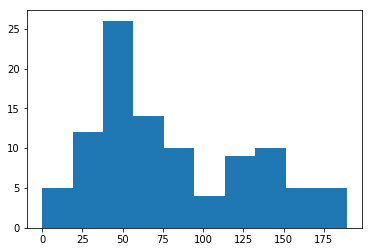

In [61]:
plt.hist(masses)

In [19]:
# use training data to infer 3 mass 
import pymc3 as pm
def _get_e1(m,h,g):
    return -(m/np.sqrt((h[:,0]-g[:,0])**2+(h[:,1]-g[:,1])**2))*np.cos(2*np.arctan((g[:,1]-h[:,1])/(g[:,0]-h[:,0])))
def get_e1(m1,m2,m3,h1,h2,h3,g):
    return  _get_e1(m1,h1,g)+_get_e1(m2,h2,g)+_get_e1(m3,h3,g)
def _get_e2(m,h,g):
    return -(m/np.sqrt((h[:,0]-g[:,0])**2+(h[:,1]-g[:,1])**2))*np.sin(2*np.arctan((g[:,1]-h[:,1])/(g[:,0]-h[:,0])))
def get_e2(m1,m2,m3,h1,h2,h3,g):
    return  _get_e2(m1,h1,g)+_get_e2(m2,h2,g)+_get_e2(m3,h3,g)
with pm.Model() as finding_3_mass_model:
    m1=pm.Uniform("mass1", 0, 1000)
    m2=pm.Uniform("mass2",0,1000)
    m3=pm.Uniform("mass3",0,1000)
    h1=pm.Flat("halo_pos1",observed=halo[['halo_x1','halo_y1']].as_matrix())   
    h2=pm.Flat("halo_pos2",observed=halo[['halo_x2','halo_y2']].as_matrix())
    h3=pm.Flat("halo_pos3",observed=halo[['halo_x3','halo_y3']].as_matrix())
    g=pm.Flat("galaxy_pos", observed=train_sky_sample[['x','y']].as_matrix())  

    e1=pm.Deterministic('e1',get_e1(m1,m2,m3,h1,h2,h3,g))
    e2=pm.Deterministic('e2',get_e2(m1,m2,m3,h1,h2,h3,g))
    # observed values have two columns 
    # e1 and e2 are both normally distributed
    # sigma can be identified from all the sigma in the training sky
    sigma=np.sqrt(0.05)
    e1_obs=pm.Normal('e1_obs',mu=e1,sd=sigma,observed=train_sky_sample.e1.values)
    e2_obs=pm.Normal('e2_obs',mu=e2,sd=sigma,observed=train_sky_sample.e2.values)

In [20]:
with finding_3_mass_model:
    map_estimate = pm.find_MAP(fmin=optimize.fmin_powell)

/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:92: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = 146:   3%|▎         | 140/5000 [00:00<00:02, 2352.23it/s]    

Optimization terminated successfully.
         Current function value: -146.003860
         Iterations: 3
         Function evaluations: 144


logp = 146:   3%|▎         | 144/5000 [00:01<00:51, 94.25it/s]  


In [23]:
for mass in ['mass1','mass2','mass3']:
    print (map_estimate[mass])

53.022312888040446
3.27378744179733e-31
24.715117035449232


In [67]:
# infer halo position 
sky=11
train_sky_sample=pd.read_csv('Train_Skies/Training_Sky%d.csv'%(sky))
import pymc3 as pm
with pm.Model() as one_mass_model:
    m=pm.Uniform("mass", 0, 180)
    h=pm.Uniform("halo_pos",0,4200,shape=(1,2))  
    g=pm.Flat("galaxy_pos", observed=train_sky_sample[['x','y']].as_matrix())   
    
    e1=pm.Deterministic('e1',get_e1(m,h,g))
    e2=pm.Deterministic('e2',get_e2(m,h,g))
    
    sigma=np.sqrt(0.05)
    e1_obs=pm.Normal('e1_obs',mu=e1,sd=sigma,observed=train_sky_sample.e1.values)
    e2_obs=pm.Normal('e2_obs',mu=e2,sd=sigma,observed=train_sky_sample.e2.values)


In [68]:
with one_mass_model:
    map_estimate = pm.find_MAP(fmin=optimize.fmin_powell)
    print (map_estimate['halo_pos'])
    trace=pm.sample(5000, start=map_estimate)

/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:92: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = 153.56:   3%|▎         | 126/5000 [00:00<00:07, 683.43it/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):


Optimization terminated successfully.
         Current function value: -153.563308
         Iterations: 3
         Function evaluations: 126
{'mass_interval__': array(0.37776013), 'halo_pos_interval__': array([[ 1.00271585e+00, -6.32077941e-04]]), 'mass': array(106.79989679), 'halo_pos': array([[3072.68729213, 2099.33631818]]), 'e1': array([ 4.47316741e-02,  5.44871692e-03, -4.73821382e-02,  1.11513995e-02,
        1.17453932e-03,  2.77695805e-02, -1.19036452e-02, -2.54158280e-02,
       -2.67880632e-02, -5.57354477e-02, -6.82957866e-02, -3.41745736e-02,
       -1.15859330e-02, -7.12188467e-02, -2.13332691e-02, -1.41653882e-01,
        3.83530238e-02,  4.25550306e-01, -3.02738581e-02, -8.36910268e-02,
       -1.73702607e-02,  5.45339033e-02,  4.98584310e-02, -1.62267866e-02,
       -4.34530745e-02, -1.84675933e-02,  5.85537821e-02, -4.57017819e-03,
        3.06796265e-02, -8.11285670e-02,  5.64201445e-02,  1.23340990e-02,
       -3.44882116e-02,  5.52236871e-02, -1.11905146e-01,  5.302

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [halo_pos_interval__, mass_interval__]
100%|██████████| 5500/5500 [00:11<00:00, 472.63it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b53e470>,
      dtype=object)

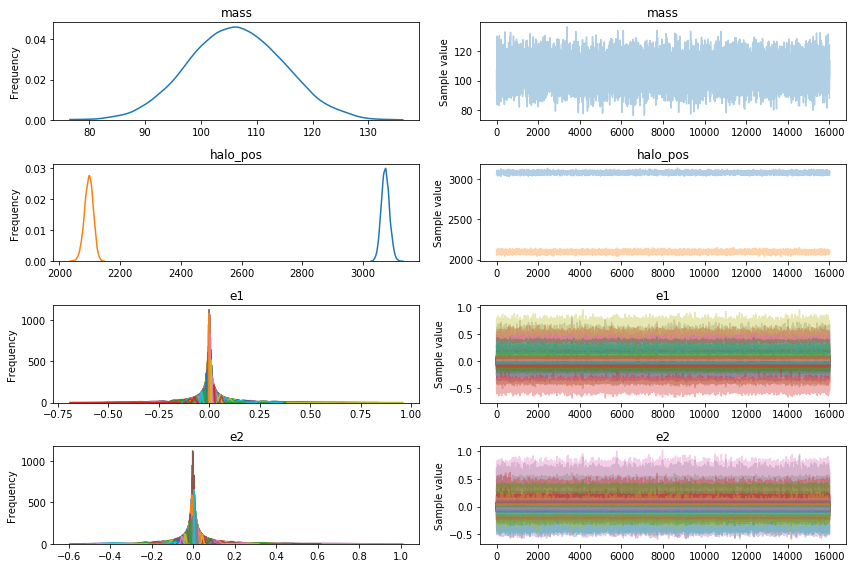

In [73]:
pm.traceplot(trace[1000:],combined=True)

In [74]:
trace['halo_pos'].shape

(20000, 1, 2)

In [75]:
t=trace['halo_pos'].reshape(20000,2)

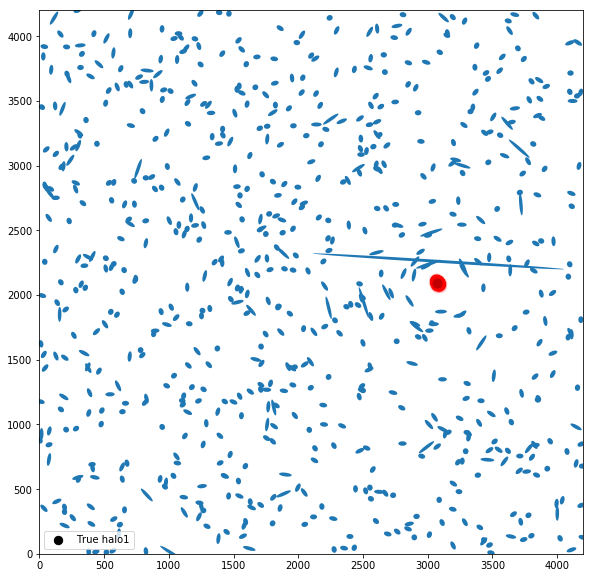

In [77]:
fig=draw_sky(train_sky_sample.as_matrix()[:,1:])
halo=halos_data[halos_data.SkyId=='Sky%d'%sky]
plt.scatter(halo.halo_x1, halo.halo_y1, 
            label = "True halo1",
            c = "k", s = 70)

plt.scatter(t[:,0], t[:,1], alpha = 0.015, c = "r")

plt.legend(scatterpoints = 1, loc = "lower left")
plt.xlim(0, 4200)
plt.ylim(0, 4200);